## Programming Task in Python

#1:Given two lists L1 = ['a', 'b', 'c'], L2 = ['b', 'd'], find common elements, find elements present in L1
and not in L2?

In [108]:
L1 = ['a','b','c']
L2 = ['b','d']

Find common elements

In [109]:
def common_elements(l1,l2) :
    # Using set property and take intersection
    return set(l1) & set(l2);

In [110]:
common_elements(L1,L2)

{'b'}

Elements present in L1 and not in L2

In [111]:
def l1_not_l2(l1,l2) :
    # Using set property and Subtraction
    return set(l1)-set(l2) ;

In [112]:
l1_not_l2(L1,L2)

{'a', 'c'}

#2: Thrusday Count between 1990-2000

In [113]:
from datetime import date  ## for data and weekday;

def thrusday_count(year_range) :
    
    min_thr = 52   ## 52 weeks in a year
    count = 0      ## Count for Thrusday
    
    for i in range(year_range[0],year_range[1]+1):
        
        if (i%100==0) :         ### Check for a decade
                            
            if (i%400==0) :     ### Check for a leap year
                        
                            ### Checking Last two Days 
                if ((date(1990, 12, 31).weekday()==3) or (date(1990, 12, 30).weekday()==3)) :
                    count += (min_thr+1) 
                else :
                    count += min_thr
                    
        elif(i%4==0) :    ###  Check for a leap year     
            
                        ### Checking Last two Days 
            if ((date(1990, 12, 31).weekday()==3) or (date(1990, 12, 31).weekday()==3)) :
                count += (min_thr+1) 
            else :
                count += min_thr

        else :
                 ### Checking Last Day
            if ((date(1990, 12, 31).weekday()==3)) :
                count += (min_thr+1) 
            else :
                count += min_thr
    return count

In [114]:
thrusday_count([1990,2000])

572

## Data Analysis Part 

# Use case 2 - 2011 India Census

In [115]:
## Loading libraries
import pandas as pd    ## for data manipulation
import numpy as np     ## for array and matrices operations  
import matplotlib.pyplot as plt         ## For interactive visualizations
import geopandas as gpd                 # For plotting maps

Setting Matplotlib plot style and figure size

In [116]:
plt.style.use(['ggplot'])
plt.rcParams['figure.figsize'] = (10,8)

#### Reading Data and Print it's first 5 rows

In [117]:
census_data = pd.read_csv('india_2011.csv')

In [118]:
census_data.head()     ##Printing Head Data

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU & KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU & KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,...,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU & KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU & KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,...,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU & KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,...,78,346,35,50,85,59,8,67,12,629


#### Showing Data Property

In [119]:
census_data.describe()     ## Describing Data

,District code,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
count,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,320.500000,1.891961e+06,9.738598e+05,9.181011e+05,1.193186e+06,6.793182e+05,5.138675e+05,3.146537e+05,1.617739e+05,1.528798e+05,...,786.046875,1696.456250,294.000000,215.300000,509.300000,194.204688,261.245313,455.450000,279.631250,3315.412500
std,184.896367,1.544380e+06,8.007785e+05,7.449864e+05,1.068583e+06,5.924144e+05,4.801816e+05,3.129818e+05,1.611216e+05,1.520336e+05,...,1038.854733,1720.535151,638.345281,362.684243,968.538748,424.108001,587.279450,1007.364839,1050.934537,4638.568719
min,1.000000,8.004000e+03,4.414000e+03,3.590000e+03,4.436000e+03,2.614000e+03,1.822000e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,160.750000,8.178610e+05,4.171682e+05,4.017458e+05,4.825982e+05,2.764365e+05,2.008920e+05,8.320850e+04,4.230700e+04,4.267175e+04,...,236.750000,589.000000,59.000000,24.750000,95.000000,19.000000,21.000000,44.000000,18.000000,1024.250000
50%,320.500000,1.557367e+06,7.986815e+05,7.589200e+05,9.573465e+05,5.483525e+05,4.038590e+05,2.460160e+05,1.255485e+05,1.178550e+05,...,518.000000,1220.500000,149.000000,118.500000,278.000000,84.000000,85.500000,186.500000,60.500000,2238.500000
75%,480.250000,2.583551e+06,1.338604e+06,1.264277e+06,1.602260e+06,9.188582e+05,6.641550e+05,4.477078e+05,2.284602e+05,2.140502e+05,...,941.250000,2233.250000,296.500000,262.000000,564.500000,213.250000,293.000000,497.000000,215.500000,3959.000000
max,640.000000,1.106015e+07,5.865078e+06,5.195070e+06,8.227161e+06,4.591396e+06,3.635765e+06,2.464032e+06,1.266504e+06,1.197528e+06,...,10334.000000,13819.000000,10835.000000,3595.000000,14430.000000,5027.000000,7597.000000,12624.000000,18289.000000,60163.000000


### understanding the data column

In [120]:

for i in census_data.columns:
    print('{}: {}\n'.format(i, census_data[i].dtype))

District code: int64

State name: object

District name: object

Population: int64

Male: int64

Female: int64

Literate: int64

Male_Literate: int64

Female_Literate: int64

SC: int64

Male_SC: int64

Female_SC: int64

ST: int64

Male_ST: int64

Female_ST: int64

Workers: int64

Male_Workers: int64

Female_Workers: int64

Main_Workers: int64

Marginal_Workers: int64

Non_Workers: int64

Cultivator_Workers: int64

Agricultural_Workers: int64

Household_Workers: int64

Other_Workers: int64

Hindus: int64

Muslims: int64

Christians: int64

Sikhs: int64

Buddhists: int64

Jains: int64

Others_Religions: int64

Religion_Not_Stated: int64

LPG_or_PNG_Households: int64

Housholds_with_Electric_Lighting: int64

Households_with_Internet: int64

Households_with_Computer: int64

Rural_Households: int64

Urban_Households: int64

Households: int64

Below_Primary_Education: int64

Primary_Education: int64

Middle_Education: int64

Secondary_Education: int64

Higher_Education: int64

Graduate_Educa

### list of all the categorical Variables

In [121]:
cat_var = [i for i in census_data.columns if census_data[i].dtype==object]
cat_var

['State name', 'District name']

In [122]:
census_data[cat_var[0]] = census_data[cat_var[0]].astype('category')
census_data[cat_var[1]] = census_data[cat_var[1]].astype('category')

### Calculating the literacy rate statewise

#### calculate total number of literate people statewise

In [123]:
lit_pop = census_data.groupby('State name')['Literate'].agg('sum')     ## Sum of Literate People of a Particular State
tot_pop = census_data.groupby('State name')['Population'].agg('sum')   ## Sum of Population of a Particular State
lit_rate = (lit_pop/tot_pop)*100                                       ## Percentage of Literate People in State

#### Printing top 10 states with lowest literacy rate

In [124]:
lit_rate.sort_values().head(10)  

State name
BIHAR                50.436916
ARUNACHAL PRADESH    55.358102
JHARKHAND            55.559581
RAJASTHAN            55.836841
JAMMU & KASHMIR      56.351669
UTTAR PRADESH        57.252497
MADHYA PRADESH       59.001861
ANDHRA PRADESH       59.773345
MEGHALAYA            60.164199
CHHATTISGARH         60.206705
dtype: float64

In [125]:
## Reading the shape files for plotting state boundaries of India.
india = gpd.read_file('INDIA.shp')

In [126]:
india.head(2)   ## Printing 1st 2 Location data

,geometry
0,"(POLYGON ((92.898888 12.915831, 92.89917 12.91..."
1,"POLYGON ((83.943192 18.214308, 83.942359999999..."


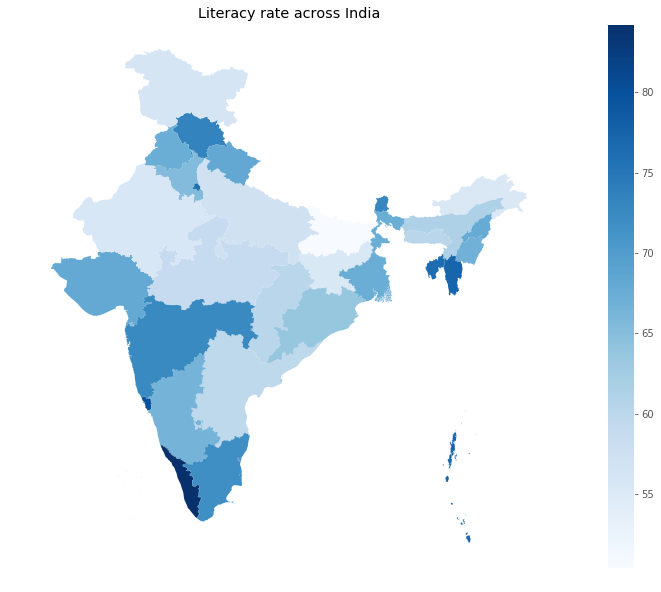

In [127]:
## Ploting Literacy Rate data
india['lit_rate'] = lit_rate.values      ## Adding Column of %Litercy in India Dataframe
india.plot(column = 'lit_rate', figsize=(20,10),cmap='Blues',legend=True)   ## Setting  Intensity Plot for %Literacy of India
plt.axis('off')
plt.title('Literacy rate across India')
plt.show()

## Finding the most simillar districts based on the given parameter
The given below code will display all the districts in Bihar simillar to districts in Tamilnadu. Based on any one numerical parameter, it will display simillar districs by measuring just the absolute difference between the numbers.
For example i have taken our parameter as the Total_Power_parity to display the simillar districts. We can use other parameters like population to display the simillarity.

In [128]:
# Here is the function to calculate absolute simillarity between Bihar and TamilNadu based on any single dimension parameter.



def Simillarity(param):
    
    B_dist = census_data[census_data['State name']== 'BIHAR']  ## Select all the districts of Bihar
    B_dist_p = B_dist[['District name',param]]

    T_dist = census_data[census_data['State name']=='TAMIL NADU']  #Select all the districts of TamilNadu
    T_dist_p = T_dist[['District name',param]]

    
    simillar = []

    for l,i in enumerate(T_dist_p[param].values):      
        temp = np.zeros(len(B_dist_p))
        for k,j in enumerate(B_dist_p[param].values):   
            temp[k] = abs(i-j)
        m = np.argmin(temp)     ### chosing the index having minimum absolute difference.

        simillar.append((l,m))
    
    d2 = B_dist_p['District name']
    d1 = T_dist_p['District name']

    simillar_dist = [(d1.iloc[i[0]], d2.iloc[i[1]]) for i in simillar]  ## Displaying all the simillar districts.
    
    return simillar_dist


        
Simillarity('Total_Power_Parity')        

[('Thiruvallur', 'Patna'),
 ('Chennai', 'Patna'),
 ('Kancheepuram', 'Patna'),
 ('Vellore', 'Patna'),
 ('Tiruvannamalai', 'Muzaffarpur'),
 ('Viluppuram', 'Muzaffarpur'),
 ('Salem', 'Patna'),
 ('Namakkal', 'Saran'),
 ('Erode', 'Patna'),
 ('The Nilgiris', 'Araria'),
 ('Dindigul', 'Muzaffarpur'),
 ('Karur', 'Aurangabad'),
 ('Tiruchirappalli', 'Patna'),
 ('Perambalur', 'Jehanabad'),
 ('Ariyalur', 'Khagaria'),
 ('Cuddalore', 'Muzaffarpur'),
 ('Nagapattinam', 'Siwan'),
 ('Thiruvarur', 'Aurangabad'),
 ('Thanjavur', 'Muzaffarpur'),
 ('Pudukkottai', 'Bhagalpur'),
 ('Sivaganga', 'Katihar'),
 ('Madurai', 'Patna'),
 ('Theni', 'Purnia'),
 ('Virudhunagar', 'Muzaffarpur'),
 ('Ramanathapuram', 'Begusarai'),
 ('Thoothukkudi', 'Saran'),
 ('Tirunelveli', 'Patna'),
 ('Kanniyakumari', 'Muzaffarpur'),
 ('Dharmapuri', 'Gopalganj'),
 ('Krishnagiri', 'Pashchim Champaran'),
 ('Coimbatore', 'Patna'),
 ('Tiruppur', 'Patna')]

## Mobile Penetration Variation with regions (districts or states) with high or low agricultural workers

In [129]:
state_list = list(census_data['State name'].unique())   ## Accessing State List

#### In worker_mobile_scatter plot method we do scatterplot between Agricultural_Workers number and  number of mobiles phones they and see if there any trend exist i.e with increasing no. of Agricultural_Workers is mobile increases

In [130]:
def worker_mobile_scatter(state) :
    state = state.upper() ;      ## Changing state name into capital 
    
    ## Ending Function with message if state not in list
    if state not in state_list :
        print(state,'Not Found')
        return ;
    
       ### Subsetting of data of Particular State and Columns 
    df1 = census_data[census_data['State name']==state]
    df = df1[['District name','Agricultural_Workers','Households_with_Telephone_Mobile_Phone_Mobile_only']]
    
     ### Renaming the Columns 
    df.rename(columns={'Agricultural_Workers':'Worker','Households_with_Telephone_Mobile_Phone_Mobile_only':'Mobile'},inplace=True)
    
    
    df.reset_index(inplace=True) 
    
    ## Sorting values on Worker_count column
    df2 = df.sort_values('Worker',ascending=True)
    
    ## Plotting Scatter Plot
    fig = plt.figure();
    plt.scatter(df2['Worker'],df2['Mobile'])
    plt.xlabel('Agricultral Worker in'+state)
    plt.ylabel('No. of Mobile Phone Variation')
    plt.title('Mobile phone Variation w.r.t worker no.')
    plt.show()

/home/bhumihar/anaconda3/envs/geopandas/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


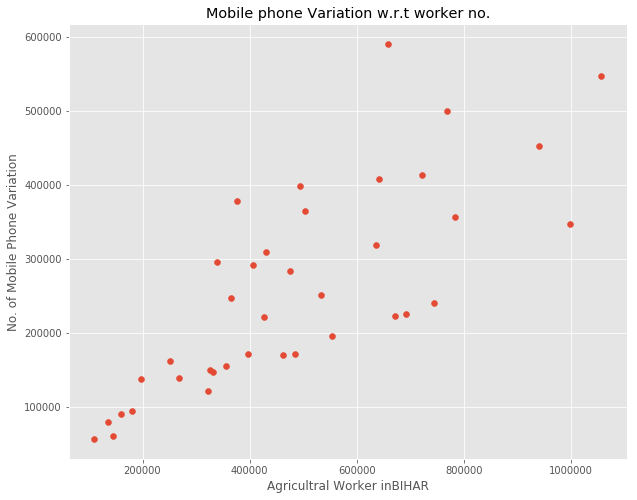

In [131]:
## Calling Functio for Bihar State
worker_mobile_scatter('bihar')

#### In worker_phone_corr  method we find correlation between Agricultural_Workers number and  number of mobiles phones for each region in state and pass them in corr_mat_plot method and plot map and visulise correlation between them using intensity plot.

In [132]:
def worker_phone_corr() :
    corr_val = []
    i=0
       
    for state in state_list : 
        
         ### Subsetting of data of Particular State and Columns 
        df1 = census_data[census_data['State name']==state]
        df = df1[['District name','Agricultural_Workers','Households_with_Telephone_Mobile_Phone_Mobile_only']]
        
        ### Renaming the Columns 
        df.rename(columns={'Agricultural_Workers':'Worker','Households_with_Telephone_Mobile_Phone_Mobile_only':'Mobile'},inplace=True)
        
         ## Resetting the index
        df.reset_index(inplace=True)
        df2 = df.sort_values('Worker',ascending=True)
        
        ## If state has only one Region then some default value
        if df2.shape[0] >1:
            corr_val.append(df2['Worker'].corr(df2['Mobile']))
        else :
            corr_val.append(0.001)
        i +=1  
    return corr_val

def corr_mat_plot(corr_val) :
        ## Reading Data 
    india = gpd.read_file('INDIA.shx')
    india['corr'] = corr_val
    
     ## Ploting Intensity Map
    india.plot(column = 'corr', figsize=(20,10),cmap='Blues',legend=True)
    plt.axis('off')
    plt.title('Mobile phone correlation w.r.t Agricultural Workers no.')
    plt.show()    

/home/bhumihar/anaconda3/envs/geopandas/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


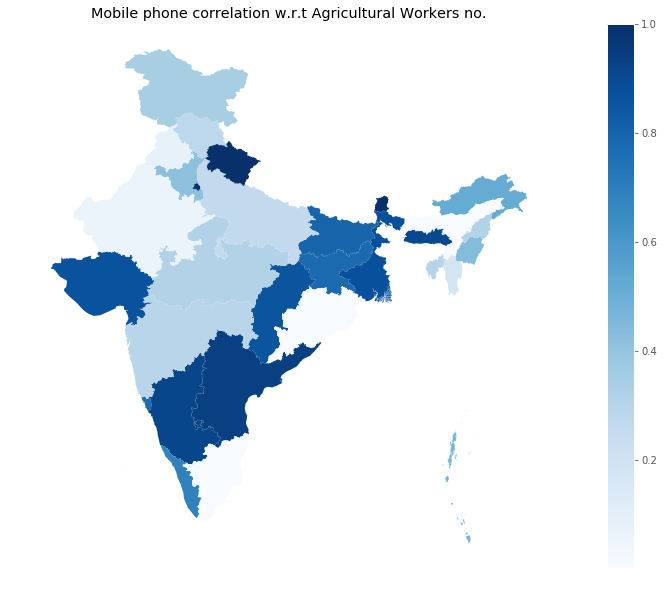

In [133]:
   ## Calling Function
corr_val = worker_phone_corr()
corr_mat_plot(corr_val)

### Demographics of India and its state

In [134]:
def state_demography(state) :
    state = state.upper()         ## Changing state name into capital 
    
    ## Ending Function with message if state not in list
    if state not in state_list :
        print(state,'Not Found')
        return ;    
    
    col_name = ['Population','Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains','Others_Religions','Religion_Not_Stated']

    ## Calculating State PoPulation
    state_pol = census_data.groupby('State name')[col_name].agg('sum')
    
    ## Calculating % of each religion of State PoPulation
    pop_val = (state_pol.loc[state][1:].values*100)/state_pol.loc[state][0]
    x_pos = np.arange(len(col_name[1:]))
    
    ## bar plot
    plt.bar(x_pos,pop_val,align='center',alpha=0.5)
    plt.xticks(x_pos,col_name)
    plt.ylabel('%Population of each Religion')
    plt.title('Demographic of '+state)
    plt.show()

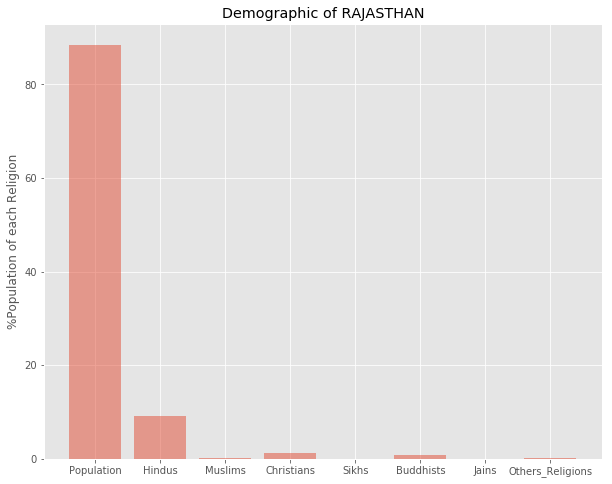

In [135]:
state_demography('Rajasthan')

### Select any Religion number which propotion across india you want to Show on Map
### 1:Hindus
### 2:Muslims
### 3:Christians
### 4:Sikhs
### 5:Buddhists
### 6:Jains
### 7:Others_Religions
### 8:Religion_Not_Stated

In [136]:
def religion_propotion(val):
    
       ## Religion Name
    col_name = ['Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains','Others_Religions','Religion_Not_Stated']
    
    ## if val in range of religion_column_size 
    if (val <= 0 or val>8) :
        print('Please Enter valid Value')
        return ;
    
    rel_pol = census_data.groupby('State name')[col_name[val-1]].agg('sum')  ## Count of population for a particular religion   
    tot_pop = census_data.groupby('State name')['Population'].agg('sum')    ## Count of population for a particular religion   
    rel_per = (rel_pol/tot_pop)*100                       ## calculating of % for each state 
    
     ### Intensity Plot
    india = gpd.read_file('INDIA.shx')
    india['Rel_per'] = rel_per.values
    india.plot(column = 'Rel_per',cmap='Blues',legend=True)
    plt.axis('off')
    plt.title(col_name[val-1]+'Percentange across india')
    plt.show() 

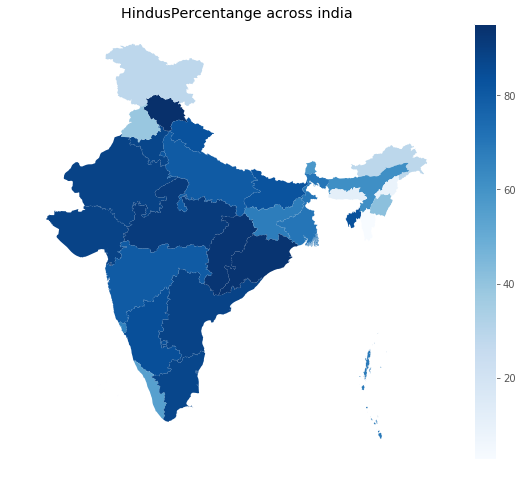

In [137]:
religion_propotion(1)

#                                          Thank You